**Group Two**

Contributors
1. Nataliia Padilla
2. Andrew George
3. Tigist Wujira
4. Beza Arega

**Wine Quality Dataset**

**Introduction**

This dataset is from UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/186/wine+quality. It includes physiochemical attributes such as acidity, alcohol content, residual sugar, and the target variable quality which rates wine quality on a scale (0-10).

**Background**

The dataset was donated to UCI in 2009 by *Vinho Verde*, a Portuguese wine company. Portugal is one of the top ten wine-exporting countries, and its wine industry has been investing in new technologies to enhance both winemaking and sales processes. Wine certification and quality assessment play a crucial role in this context. Certification helps prevent the illegal adulteration of wines (safeguarding human health) and ensures product quality in the market. Quality evaluation is often a part of the certification process and can also be used to identify key factors in winemaking, as well as to categorize wines, such as distinguishing premium brands, which is valuable for pricing strategies.

Wine certification is typically assessed through a combination of physicochemical and sensory tests. Physicochemical laboratory tests, such as the determination of density, alcohol content, and pH levels, are commonly used to characterize wine. Sensory tests, on the other hand, primarily rely on human experts. It is important to note that taste remains one of the least understood of the human senses, making wine classification a particularly challenging task. Moreover, the relationships between physicochemical and sensory analysis are complex and not yet fully understood.

Advances in information technologies now allow for the collection, storage, and processing of large, complex datasets. These datasets contain valuable information, such as trends and patterns, that can be leveraged to improve decision-making and optimize chances of success.

Therefore, the models developed from this data are intended to support wine testing evaluations and enhance wine production processes.


## Wine quality dataset

https://archive.ics.uci.edu/dataset/186/wine+quality

Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [56]:
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [58]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [59]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [60]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


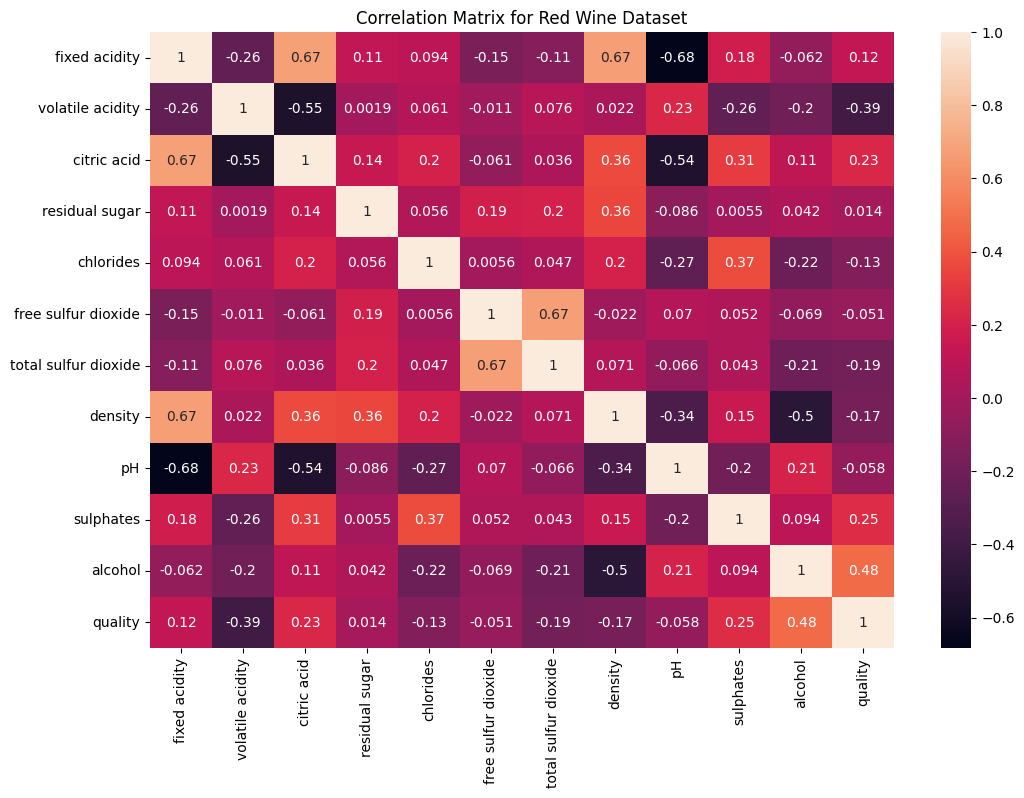

In [61]:
#plot correlation matrix for df_red
plt.figure(figsize=(12, 8))
sns.heatmap(df_red.corr(), annot=True)
plt.title("Correlation Matrix for Red Wine Dataset")
plt.show()

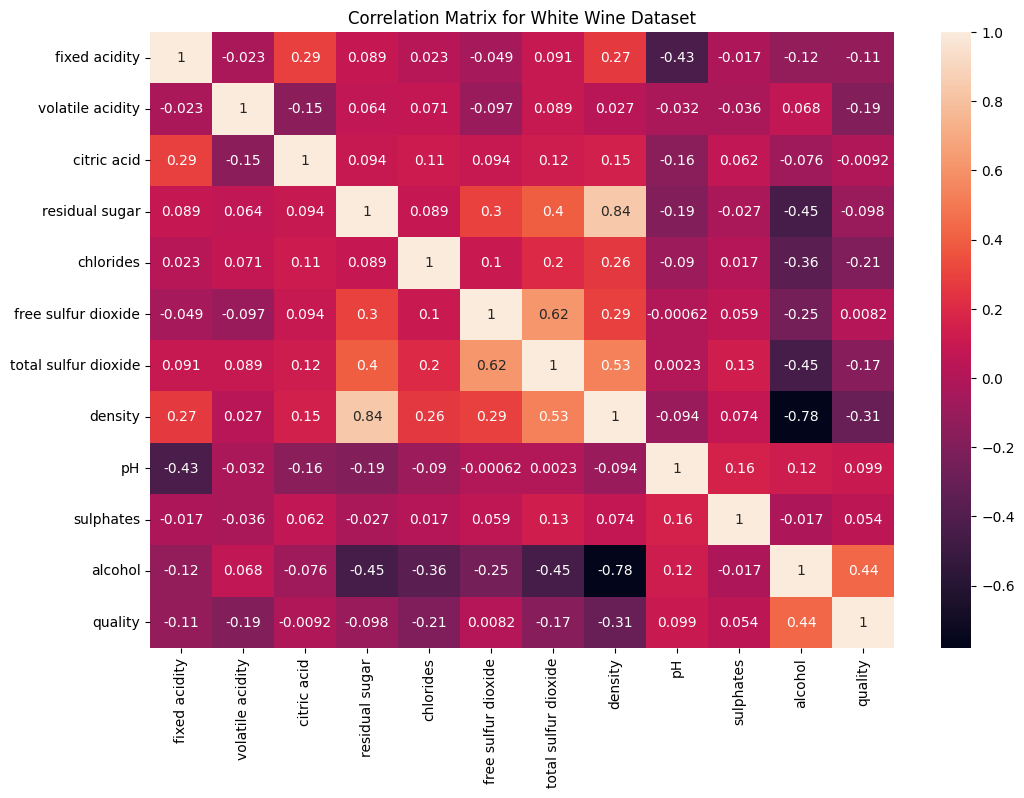

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_white.corr(), annot=True)
plt.title("Correlation Matrix for White Wine Dataset")
plt.show()

Both datasets show a positive correlation between alcohol and wine quality. This indicates that higher alcohol content corresponds to better quality in both white and red wines. Next, in both datasets, free sulfur dioxide and total sulfur dioxide are strongly positively correlated. Contrastingly, in the white wine dataset, fixed acidity has a weak negative correlation with quality while in the red wine dataset, fixed acidity shows a weak positive correlation with quality. For white wine, sulphates have a weak positive correlation with quality (0.054). Wheras for red wine, the correlation is stronger (0.25), suggesting that sulphates play a more significant role in red wine quality. Lastly, in the white wine dataset, citric acid has little to no correlation with quality (-0.0092). But in the red wine dataset, citric acid is positively correlated with quality (0.23).

<ipython-input-63-4852309be075>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_red, palette='viridis')


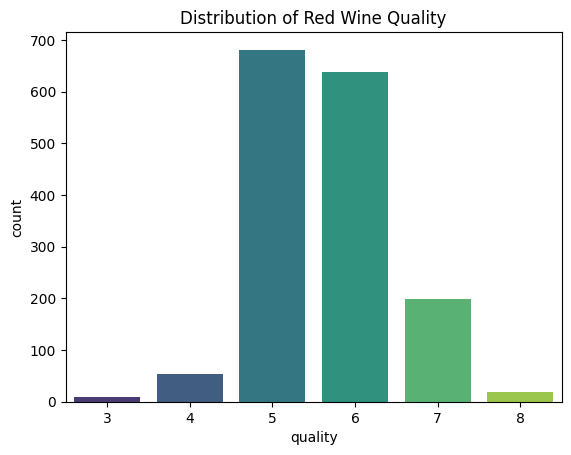

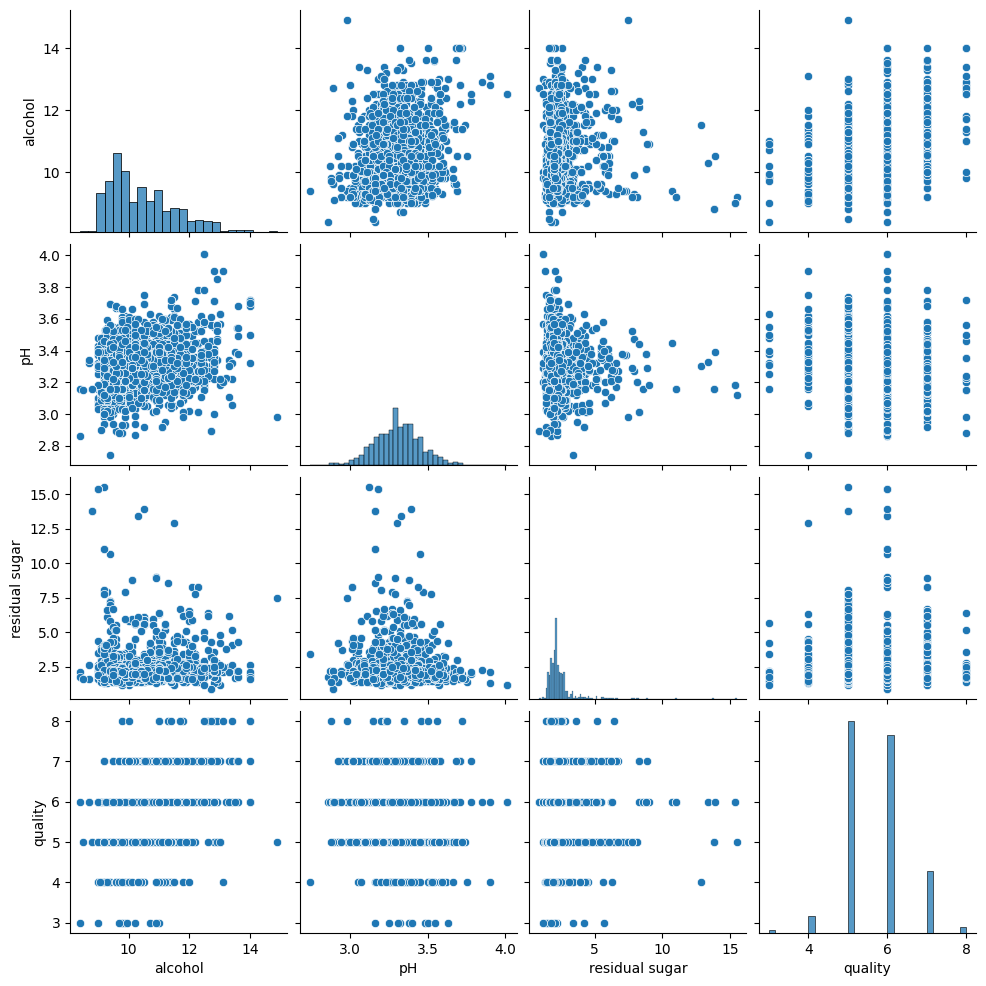

In [63]:
# Distribution of quality for red wine
sns.countplot(x='quality', data=df_red, palette='viridis')
plt.title("Distribution of Red Wine Quality")

# Pairplot for selected features
sns.pairplot(df_red, vars=['alcohol', 'pH', 'residual sugar', 'quality'])


<ipython-input-64-0f8a69d4ab07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_white, palette='viridis')


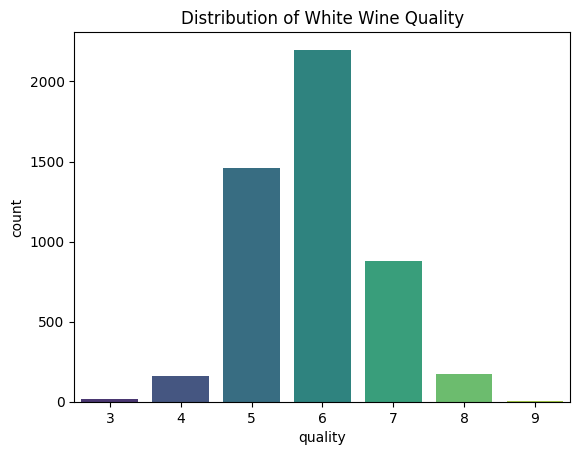

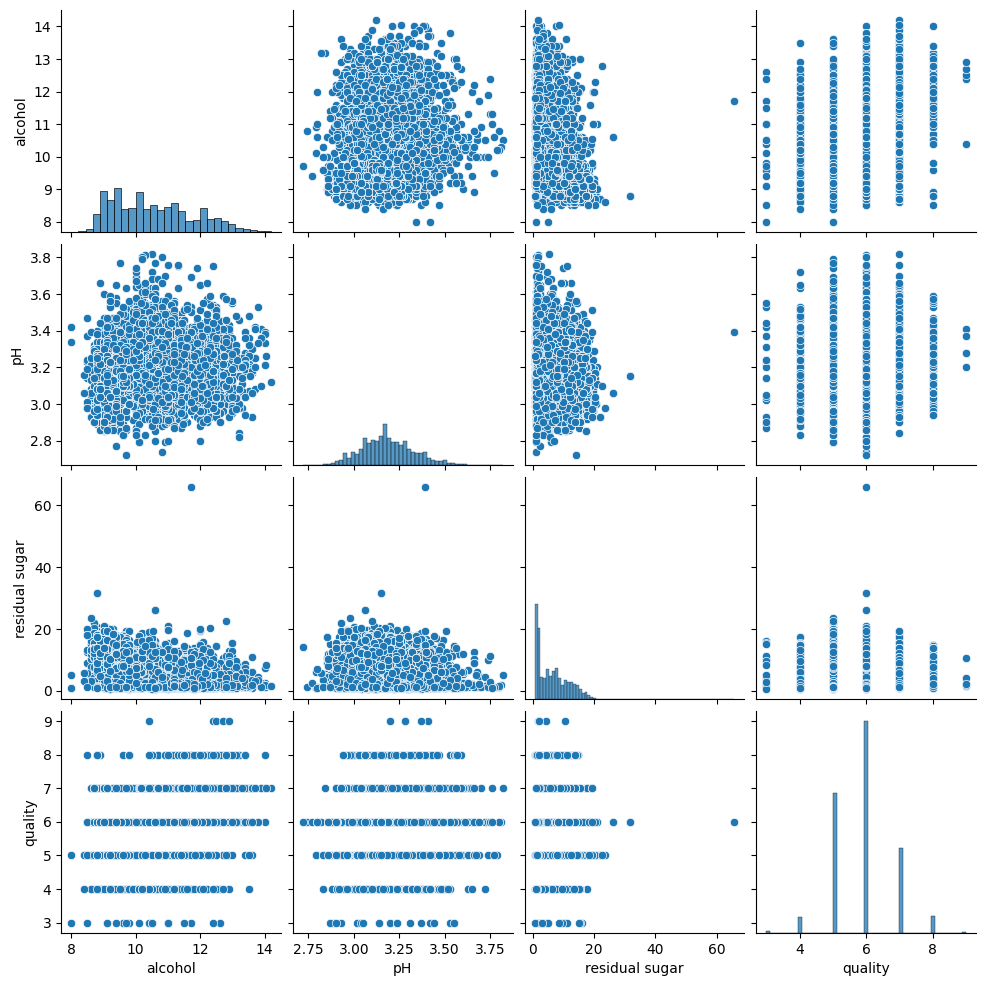

In [64]:
# Distribution of quality for white wine
sns.countplot(x='quality', data=df_white, palette='viridis')
plt.title("Distribution of White Wine Quality")

# Pairplot for selected features
sns.pairplot(df_white, vars=['alcohol', 'pH', 'residual sugar', 'quality'])


The Mean quality of white wine is 5.88.

The Mean quality of red wine is 5.64.

# Linear Regression

we used the white wine dataset for linear regression

In [65]:
np.random.seed(42)

In [66]:
# Define features (X) and target (y)
X = df_white.drop(columns=['quality'])
X.shape



(4898, 11)

In [67]:
y = df_white['quality']
y.shape

(4898,)

In [68]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [69]:
X_train.shape, y_train.shape

((3428, 11), (3428,))

In [70]:
X_test.shape, y_test.shape


((1470, 11), (1470,))

In [71]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict
y_pred = model.predict(X_test)

In [73]:
# Evaluation
# We evaluate the accuracy of the model by using the mean square error (MSE) and R²
MSE = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {MSE:.4f}")

Mean Squared Error: 0.5543


In [74]:
print(mean_squared_error(y_true = y_test, y_pred = model.predict(X_test)))

0.554292733013674


In [75]:
#What is the error on the training data
print(mean_squared_error(y_true = y_train, y_pred = model.predict(X_train)))

0.5682017769839607


In [76]:
# How much does the model (the x variable) explain  the variability of the response data around its mean?
R_Square= model.score(X_test, y_test)
print(f"R²: {R_Square:.4f}")

R²: 0.2659


Only 26.59% of the variability in the target (dependent variable) is explained by the model.

Text(0, 0.5, 'Frequency')

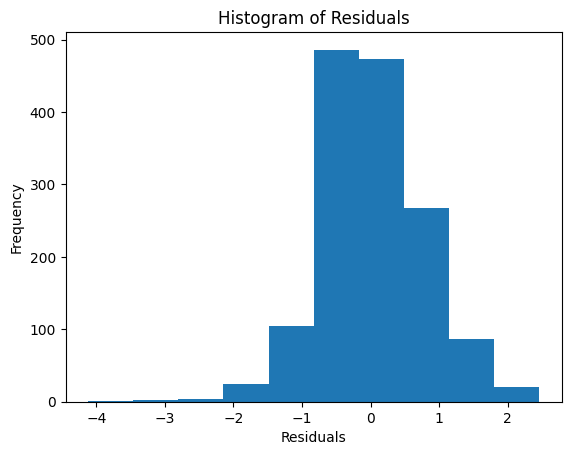

In [77]:
#Histogram of residuals
plt.hist(y_test - y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

The histogram of the residuals appear to be mostly centered around zero with a peak resembling a bell curve, which suggests they are fairly close to a Gaussian (normal) distribution.

Text(0, 0.5, 'Residuals')

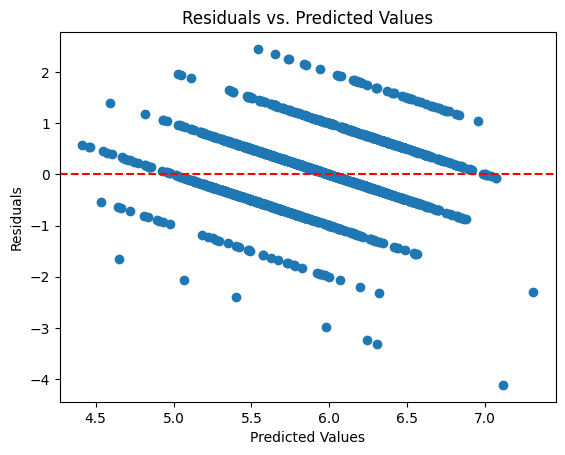

In [78]:
plt.scatter(y_pred, y_test - y_pred)
plt.title("Residuals vs. Predicted Values")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

The residuals vs. predicted values plot shows a pattern indicating potential heteroscedasticity. If the residuals were homoscedastic, they would be randomly scattered around the horizontal axis without any distinct patterns. However, in this plot, the residuals appear to fan out, suggesting that the variance of the residuals may increase with higher predicted values. This pattern implies that the homoscedasticity assumption (constant variance of errors) may not be met in this data.

In [79]:
#Extract Coeficients
print(model.coef_)

# Interpretation
#High coefficients indicate a strong influence of that feature on wine quality.

[ 5.22779588e-02 -1.92810748e+00 -8.53514666e-02  7.46503922e-02
  2.87159821e-01  4.62554345e-03 -1.70763258e-04 -1.31163736e+02
  6.46916495e-01  6.91335140e-01  2.26296475e-01]


Each coefficient reflects the influence of a particular feature on the quality score.

For example

- Fixed Acidity (5.22779588e-02): A one-unit increase in fixed acidity is associated with a 0.0522 increase in quality.
- Volatile Acidity (-1.92810748e+00): A one-unit increase in volatile acidity reduces the predicted quality score by 1.928, indicating a negative impact.
- Density (-1.31163736e+02): Density has a large negative coefficient, which suggests it has a significant influence on reducing quality.

Larger absolute values for coefficients (like density and volatile acidity) indicate features with more significant effects on quality, either positively or negatively. Overall, these coefficients give insight into which chemical properties might be most influential in predicting wine quality in the dataset.


In [80]:
#Print Intercepts
print(model.intercept_)

131.04909051694733


### Decision Tree classification

In [81]:
#Decision Tree for Red Wine
X = df_red.drop(columns=['quality'])
y = df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) #we use 20% of the data for testing
dt = DecisionTreeRegressor(max_depth = 4,
                           min_samples_leaf=0.1, #training set contains at least 10% of the data
                           random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
#Compute the means squared value
mse_dt = mean_squared_error(y_test, y_pred)
#MSE measures how far off the predictions are from the true values, with larger values indicating worse performance.
print(f"MSE: {mse_dt:.4f}")
rmse_dt = mse_dt**(1/2)
# RMSE gives a more interpretable metric because it’s in the same units as the target variable (wine quality).
#It reflects how much on average the model’s predictions differ from the actual values.
print(f"RMSE: {rmse_dt:.4f}")

MSE: 0.4080
RMSE: 0.6388


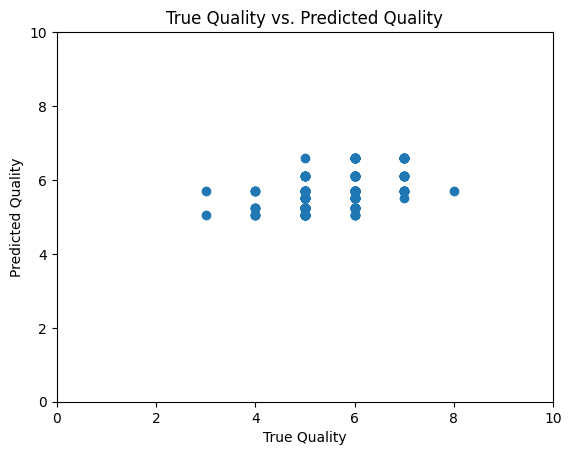

In [82]:
#scatterplot of true quality values vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("True Quality vs. Predicted Quality")
plt.xlim(0, max(y_test.max(), 10))  # Set x-axis range from 0 to 10
plt.ylim(0, max(y_test.max(), 10))
plt.show()

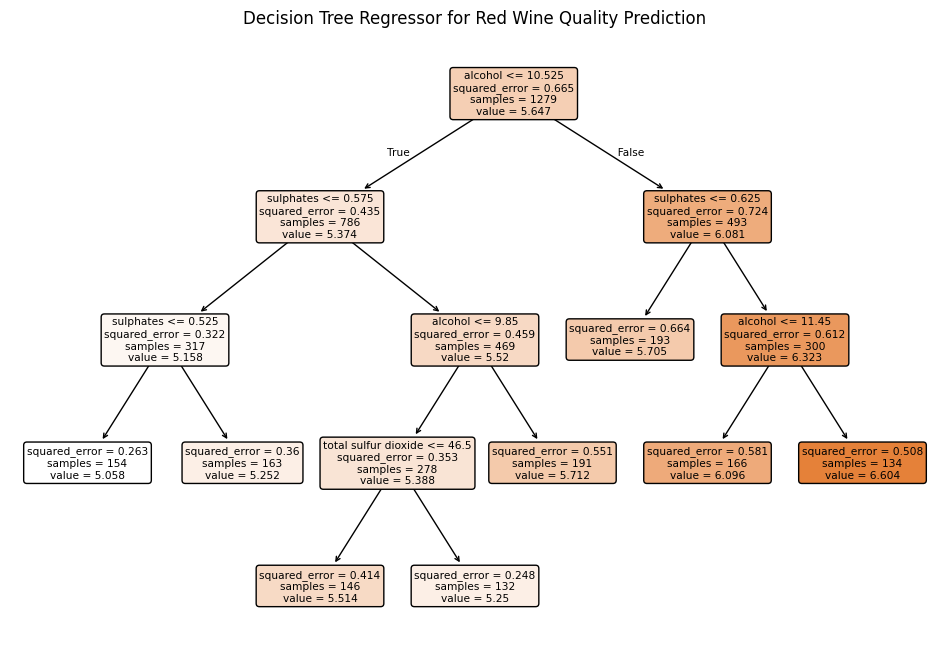

In [83]:
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(dt, filled=True, feature_names=X.columns, rounded=True, proportion=False, max_depth=4)
plt.xlabel("Features")
plt.ylabel("Decision Tree")
plt.title("Decision Tree Regressor for Red Wine Quality Prediction")
plt.show()